## Data Preprocessing of centralized datasets 

In [2]:
import zipfile
import pandas as pd
import os

# Directory containing the ZIP files
data_dir = 'data/Centralized'

# Initialize an empty list to store DataFrames
dfs = []

# Define column name mappings
column_mappings = {
    'timestamp': ['Time', 'Date', 'timestamp'],
    'low': ['marketLow', 'Low', 'low'],
    'high': ['marketHigh', 'High', 'high'],
    'close': ['close', 'Close', 'marketClose'],
    'volume': ['volume', 'Volume', 'marketVolume']
}

# Function to rename columns based on mappings
def rename_columns(df):
    for standard_name, possible_names in column_mappings.items():
        for name in possible_names:
            if name in df.columns:
                df.rename(columns={name: standard_name}, inplace=True)
                break
    return df

# Iterate through all files in the directory
for file_name in os.listdir(data_dir):
    if file_name.endswith('.zip'):
        zip_path = os.path.join(data_dir, file_name)
        with zipfile.ZipFile(zip_path, 'r') as z:
            for csv_file in z.namelist():
                if csv_file.endswith('.csv'):
                    with z.open(csv_file) as f:
                        df = pd.read_csv(f)
                        df = rename_columns(df)
                        # Keep only the required columns
                        required_columns = ['timestamp', 'low', 'high', 'close', 'volume']
                        df = df[required_columns]
                        df['file_name'] = csv_file
                        df['Zip file name'] = file_name
                        dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

combined_df['Centralized/Decentralized'] = 1

# Display some heads of the combined DataFrame
print(combined_df.head())

       timestamp     low    high    close    volume  \
0  2/1/2019 9:30  166.67  167.55  167.150  789821.0   
1  2/1/2019 9:31  166.80  167.42  167.175  170656.0   
2  2/1/2019 9:32  166.88  167.20  166.910  133658.0   
3  2/1/2019 9:33  166.77  167.11  166.958  120666.0   
4  2/1/2019 9:34  166.92  167.19  167.180  102236.0   

                               file_name           Zip file name  \
0  HFTTradingMAP-main/HFTData/AAPL_n.csv  HFTTradingMAP-main.zip   
1  HFTTradingMAP-main/HFTData/AAPL_n.csv  HFTTradingMAP-main.zip   
2  HFTTradingMAP-main/HFTData/AAPL_n.csv  HFTTradingMAP-main.zip   
3  HFTTradingMAP-main/HFTData/AAPL_n.csv  HFTTradingMAP-main.zip   
4  HFTTradingMAP-main/HFTData/AAPL_n.csv  HFTTradingMAP-main.zip   

   Centralized/Decentralized  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  


## Data Preprocessing of decentralized datasets - TO DO

In [48]:
# I ran this once again yesterday to have up to date data, do not re-run 

'''
# Write here the code to get decentralized datasets

# Get eterscan Data
import requests
import json

# Etherscan API details
api_key = "5QWEKQCCI9VPTBFP6TRZU4HIE7AGTKAYR1"
address = "0x0bAe6494d778C57E1991F8651aef06f786fA23DC"
url = f"https://api.etherscan.io/api?module=account&action=txlist&address={address}&startblock=0&endblock=99999999&page=1&offset=10000&sort=asc&apikey={api_key}"

# Fetch data
response = requests.get(url)
data = response.json()

# Save data to a file
with open("transactions.json", "w") as file:
    json.dump(data, file, indent=4)

print("Transactions saved to transactions.json")'''


Transactions saved to transactions.json


In [6]:
import pandas as pd
import os

# Specify the directory containing the CSV files
directory_path = 'data/Decentralized'

# Dictionary to hold DataFrames for each currency and timeframe
dataframes = {
    'ADA': {
        
        '1sec': None
    },
    'BTC': {
        
        '1sec': None
    },
    'ETH': {
        
        '1sec': None
    }
}

# Iterate through all files in the directory
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        
        # Read the CSV file
        df = pd.read_csv(file_path)
        
        # Determine the currency and timeframe from the filename
        if 'ADA' in filename:
            if '1sec' in filename:
                dataframes['ADA']['1sec'] = df
        elif 'BTC' in filename:
            if '1sec' in filename:
                dataframes['BTC']['1sec'] = df
        elif 'ETH' in filename:
            if '1sec' in filename:
                dataframes['ETH']['1sec'] = df

# Optionally, you can concatenate the DataFrames for each currency and timeframe
# For example, if you want to concatenate all timeframes for ADA:
ada_combined = pd.concat([dataframes['ADA']['1sec']], ignore_index=True)
btc_combined = pd.concat([dataframes['BTC']['1sec']], ignore_index=True)
eth_combined = pd.concat([dataframes['ETH']['1sec']], ignore_index=True)

# Add a column to indicate the source of the data
ada_combined['Centralized/Decentralized'] = '2'
btc_combined['Centralized/Decentralized'] = '2'
eth_combined['Centralized/Decentralized'] = '2'

# Print the combined DataFrames for each currency
print("ADA Combined DataFrame:")
print(ada_combined)

print("\nBTC Combined DataFrame:")
print(btc_combined)

print("\nETH Combined DataFrame:")
print(eth_combined)

ADA Combined DataFrame:
         Unnamed: 0                       system_time  midpoint  spread  \
0                 0  2021-04-07 11:33:00.055697+00:00   1.17075  0.0015   
1                 1  2021-04-07 11:33:01.055697+00:00   1.17005  0.0001   
2                 2  2021-04-07 11:33:02.055697+00:00   1.17045  0.0009   
3                 3  2021-04-07 11:33:03.055697+00:00   1.17005  0.0001   
4                 4  2021-04-07 11:33:04.055697+00:00   1.17005  0.0001   
...             ...                               ...       ...     ...   
1030528     1030528  2021-04-19 09:49:37.442103+00:00   1.27105  0.0001   
1030529     1030529  2021-04-19 09:49:38.442103+00:00   1.27105  0.0001   
1030530     1030530  2021-04-19 09:49:39.442103+00:00   1.27070  0.0004   
1030531     1030531  2021-04-19 09:49:40.442103+00:00   1.27055  0.0001   
1030532     1030532  2021-04-19 09:49:41.442103+00:00   1.27055  0.0001   

                buys        sells  bids_distance_0  bids_distance_1  \
0   

In [20]:
import pandas as pd
from binance.client import Client
from datetime import datetime
import time



client = Client()  

# Date range
start_date = "2021-04-07 11:30:00"  
end_date = "2021-04-19 23:59:59"    


start_time = int(datetime.strptime(start_date, "%Y-%m-%d %H:%M:%S").timestamp() * 1000)
end_time = int(datetime.strptime(end_date, "%Y-%m-%d %H:%M:%S").timestamp() * 1000)

# Candlestick data
symbol = "ETHUSDT"
interval = Client.KLINE_INTERVAL_15MINUTE  # 5 minute interval
klines = client.get_klines(symbol=symbol, interval=interval, startTime=start_time, endTime=end_time, limit = 1000)


dex_df = pd.DataFrame(klines, columns=[
    "timestamp", "open", "high", "low", "close", "volume",
    "close_time", "quote_asset_volume", "number_of_trades",
    "taker_buy_base_asset_volume", "taker_buy_quote_asset_volume", "ignore"
])


dex_df = dex_df[["timestamp", "low", "high", "close", "volume"]]


dex_df["timestamp"] = pd.to_datetime(dex_df["timestamp"], unit='ms')


dex_df[["low", "high", "close", "volume"]] = dex_df[["low", "high", "close", "volume"]].astype(float)

dex_df['Centralized/Decentralized'] = 2


print(dex_df)





              timestamp      low     high    close       volume  \
0   2021-04-07 09:30:00  2033.00  2048.83  2044.34  11264.60821   
1   2021-04-07 09:45:00  2041.79  2057.79  2053.31   8300.35340   
2   2021-04-07 10:00:00  2038.90  2057.44  2056.89   7180.17974   
3   2021-04-07 10:15:00  2044.44  2058.00  2047.59   6521.51657   
4   2021-04-07 10:30:00  2023.27  2049.90  2025.62   9882.06293   
..                  ...      ...      ...      ...          ...   
995 2021-04-17 18:15:00  2357.90  2375.00  2368.18   7886.69501   
996 2021-04-17 18:30:00  2366.27  2375.57  2370.36   6175.97842   
997 2021-04-17 18:45:00  2357.02  2370.42  2362.00   4771.28162   
998 2021-04-17 19:00:00  2361.84  2382.79  2382.20   7000.68438   
999 2021-04-17 19:15:00  2368.38  2384.25  2371.74   6012.80606   

     Centralized/Decentralized  
0                            2  
1                            2  
2                            2  
3                            2  
4                            2

In [12]:
import pandas as pd
from datetime import datetime
import json
import numpy as np

# Assuming dex_df is already defined and contains candlestick data
dex_df["timestamp"] = pd.to_datetime(dex_df["timestamp"])

tx_df = 

# Match transaction timestamp to candlestick timestamp
def match_transaction_to_candle(tx_timestamp, dex_df):
    for _, row in dex_df.iterrows():
        kline_start = row["timestamp"]
        kline_end = kline_start + pd.Timedelta(minutes=5)
        if kline_start <= tx_timestamp < kline_end:
            return row  # Return the entire row for later use
    # Return a Series with NaN values if no match is found
    return pd.Series({col: np.nan for col in dex_df.columns})

# Add matching candlestick data to the transactions
matched_candles = tx_df["timestamp"].apply(lambda x: match_transaction_to_candle(x, dex_df))

# Convert matched_candles to a DataFrame
matched_candles_df = pd.DataFrame(matched_candles, columns=dex_df.columns)

# Combine the transaction DataFrame with the matched candlestick data
tx_df = pd.concat([tx_df.reset_index(drop=True), matched_candles_df.reset_index(drop=True)], axis=1)

# Rename the candlestick columns to avoid confusion
tx_df.rename(columns={
    'high': 'candle_high',
    'low': 'candle_low',
    'close': 'candle_close'
}, inplace=True)

tx_df = tx_df.dropna()

# Now tx_df contains only transactions that occurred during candlestick periods
# and includes the high, low, and close from the corresponding candlestick
print(tx_df)

            timestamp  gas_used  gas_price_gwei  gas_fee_ether     value  \
0 2024-11-24 13:49:35     21000        8.867516       0.000186  0.001138   
1 2024-11-25 06:52:35     21000        7.476160       0.000157  0.000401   
2 2024-11-25 10:25:35     21000       16.273978       0.000342  0.001162   
3 2024-11-25 11:46:35     21000       17.821256       0.000374  0.001066   

            timestamp  candle_low  candle_high  candle_close     volume  \
0 2024-11-24 13:45:00     3312.09      3328.96       3324.67  2574.6030   
1 2024-11-25 06:50:00     3377.01      3380.77       3379.61   742.9154   
2 2024-11-25 10:25:00     3488.05      3496.00       3490.96  4211.8268   
3 2024-11-25 11:45:00     3453.02      3475.00       3456.59  5045.6677   

   Centralized/Decentralized  
0                        2.0  
1                        2.0  
2                        2.0  
3                        2.0  


Analyzing market microstructure for BTC...



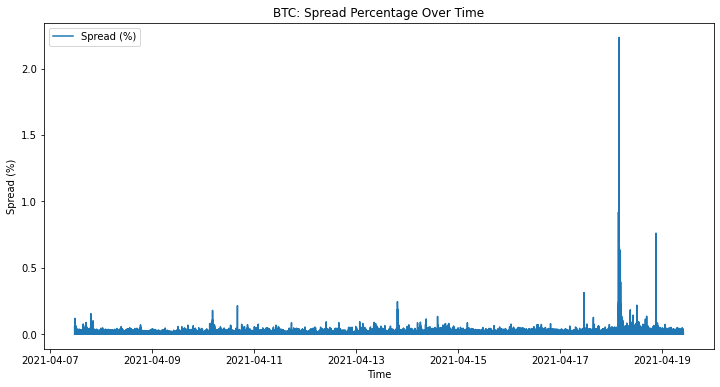

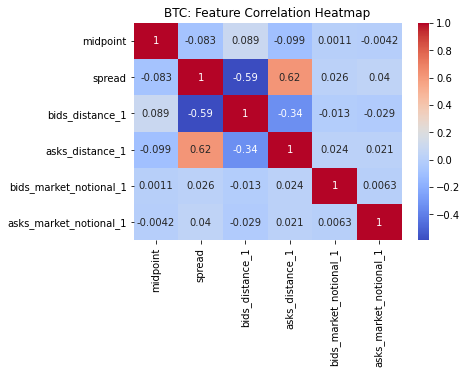

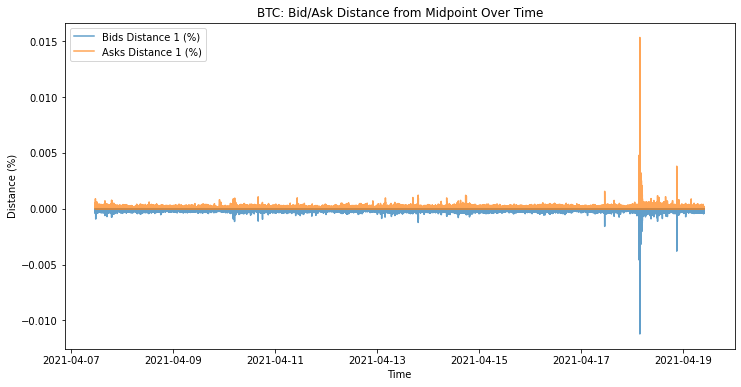

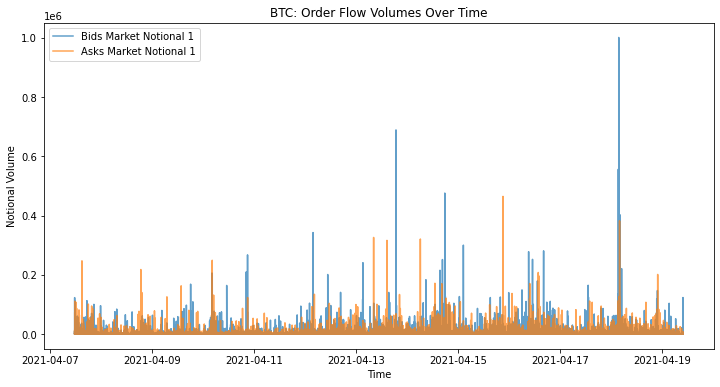

--- Summary Statistics for BTC ---
           midpoint        spread  spread_percentage  bids_distance_1  \
count  1.030728e+06  1.030728e+06       1.030728e+06     1.030728e+06   
mean   5.997507e+04  1.314033e+00       2.224659e-03    -4.748918e-05   
std    2.490049e+03  4.713295e+00       8.305149e-03     6.664107e-05   
min    5.197818e+04  1.000000e-02       1.540909e-05    -1.122119e-02   
25%    5.800001e+04  1.000000e-02       1.627585e-05    -7.008242e-05   
50%    6.014658e+04  1.000000e-02       1.677517e-05    -2.803738e-05   
75%    6.218776e+04  1.000000e-02       1.776911e-05    -2.622042e-06   
max    6.489675e+04  1.245100e+03       2.234368e+00    -2.314625e-07   

       asks_distance_1  bids_market_notional_1  asks_market_notional_1  
count     1.030728e+06            1.030728e+06            1.030728e+06  
mean      4.443486e-05            7.575712e+01            9.491737e+01  
std       7.082221e-05            2.388094e+03            1.841362e+03  
min       2.313

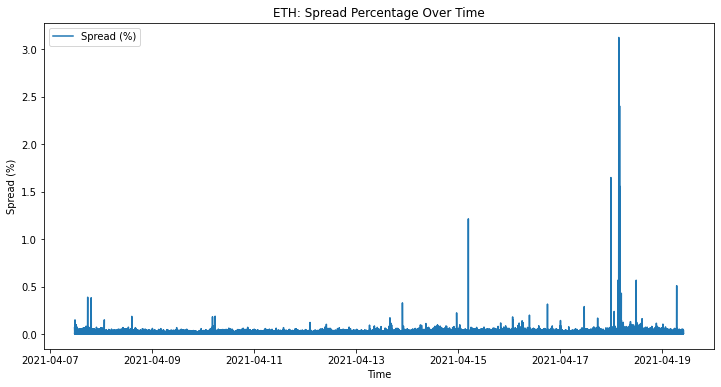

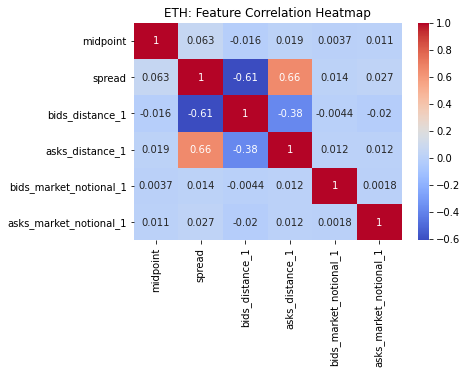

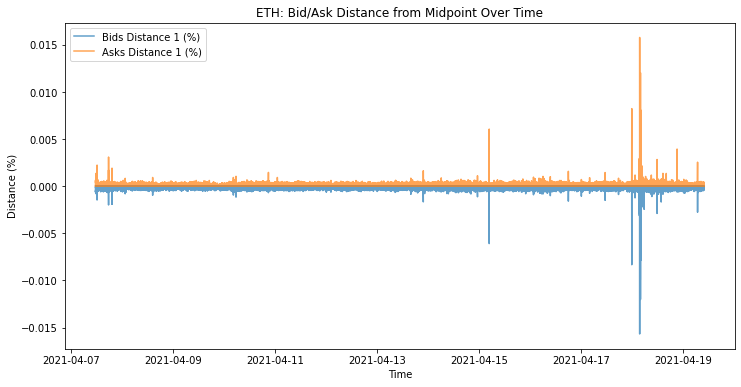

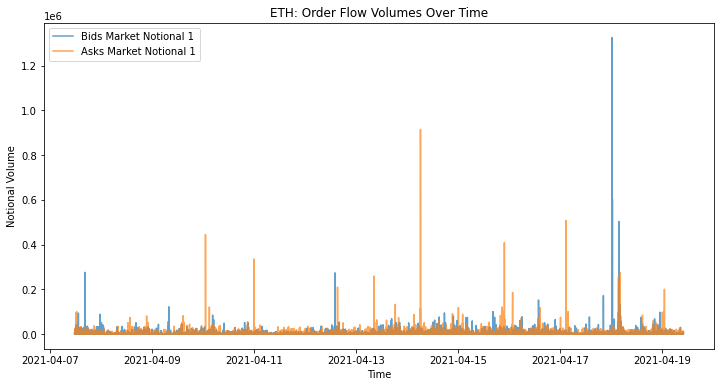

--- Summary Statistics for ETH ---
           midpoint        spread  spread_percentage  bids_distance_1  \
count  1.030775e+06  1.030775e+06       1.030775e+06     1.030775e+06   
mean   2.227434e+03  1.550651e-01       6.944661e-03    -7.840844e-05   
std    1.546407e+02  2.621285e-01       1.188394e-02     8.489597e-05   
min    1.930395e+03  1.000000e-02       3.924685e-04    -1.567475e-02   
25%    2.122495e+03  1.000000e-02       4.613472e-04    -1.047436e-04   
50%    2.167845e+03  1.000000e-02       4.967796e-04    -6.313235e-05   
75%    2.378140e+03  2.600000e-01       1.167533e-02    -2.154966e-05   
max    2.547975e+03  6.482000e+01       3.122426e+00    -5.887028e-06   

       asks_distance_1  bids_market_notional_1  asks_market_notional_1  
count     1.030775e+06            1.030775e+06            1.030775e+06  
mean      7.109623e-05            4.170932e+01            7.663601e+01  
std       8.518845e-05            1.814777e+03            1.713943e+03  
min       5.887

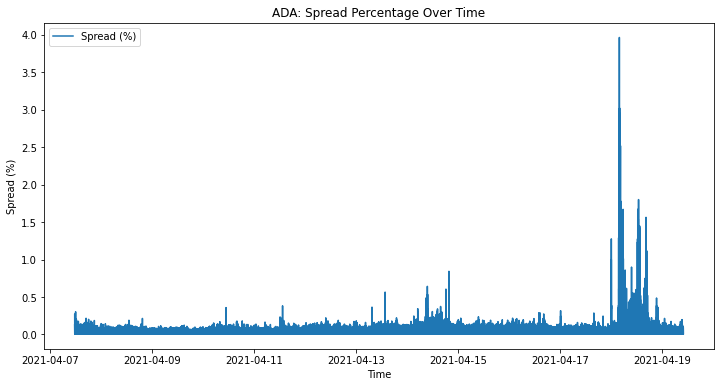

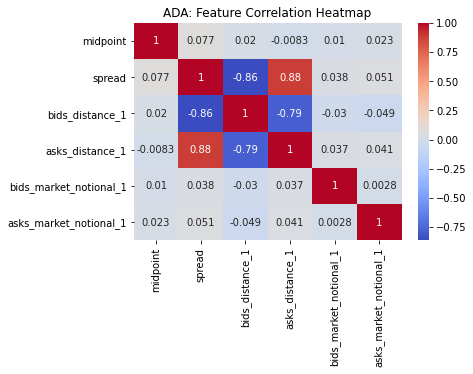

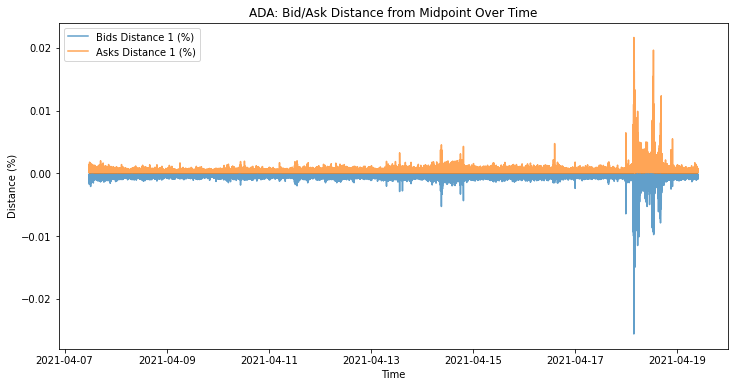

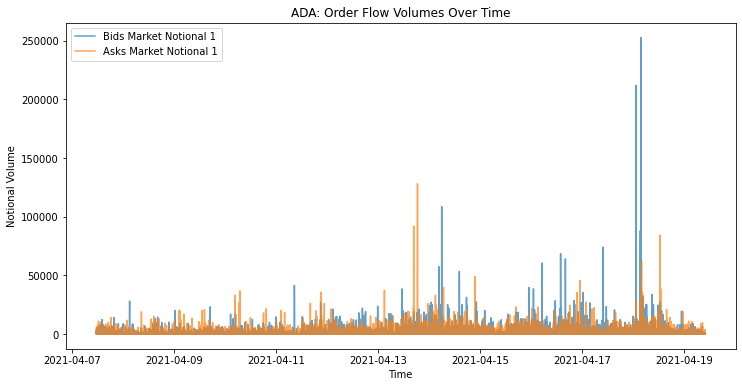

--- Summary Statistics for ADA ---
           midpoint        spread  spread_percentage  bids_distance_1  \
count  1.030533e+06  1.030533e+06       1.030533e+06     1.030533e+06   
mean   1.315095e+00  6.709438e-04       5.099785e-02    -3.983148e-04   
std    1.022080e-01  7.118355e-04       5.561216e-02     3.313760e-04   
min    1.130450e+00  1.000000e-04       6.415809e-03    -2.558572e-02   
25%    1.214800e+00  4.000000e-04       2.807412e-02    -4.449658e-04   
50%    1.299450e+00  6.000000e-04       4.208223e-02    -3.398817e-04   
75%    1.416300e+00  8.000000e-04       6.080054e-02    -2.681479e-04   
max    1.558650e+00  5.270000e-02       3.964940e+00    -9.661524e-05   

       asks_distance_1  bids_market_notional_1  asks_market_notional_1  
count     1.030533e+06            1.030533e+06            1.030533e+06  
mean      3.973445e-04            1.909031e+01            3.415521e+01  
std       3.240651e-04            5.472118e+02            4.357458e+02  
min       9.652

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Combine all dataframes for broader analysis
crypto_dfs = {"BTC": btc_combined, "ETH": eth_combined, "ADA": ada_combined}

# Define a function to analyze microstructure
def analyze_market_microstructure(df, crypto_name):
    print(f"Analyzing market microstructure for {crypto_name}...\n")
    
    # Calculate spread percentage relative to the midpoint
    df['spread_percentage'] = (df['spread'] / df['midpoint']) * 100
    
    # Plot spread vs. time
    plt.figure(figsize=(12, 6))
    plt.plot(df['system_time'], df['spread_percentage'], label="Spread (%)")
    plt.title(f"{crypto_name}: Spread Percentage Over Time")
    plt.xlabel("Time")
    plt.ylabel("Spread (%)")
    plt.legend()
    plt.show()

    # Correlation heatmap for numerical features
    corr_matrix = df[['midpoint', 'spread', 'bids_distance_1', 'asks_distance_1',
                      'bids_market_notional_1', 'asks_market_notional_1']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
    plt.title(f"{crypto_name}: Feature Correlation Heatmap")
    plt.show()

    # Bid/Ask distance dynamics
    plt.figure(figsize=(12, 6))
    plt.plot(df['system_time'], df['bids_distance_1'], label="Bids Distance 1 (%)", alpha=0.7)
    plt.plot(df['system_time'], df['asks_distance_1'], label="Asks Distance 1 (%)", alpha=0.7)
    plt.title(f"{crypto_name}: Bid/Ask Distance from Midpoint Over Time")
    plt.xlabel("Time")
    plt.ylabel("Distance (%)")
    plt.legend()
    plt.show()

    # Analyze order flow volumes
    plt.figure(figsize=(12, 6))
    plt.plot(df['system_time'], df['bids_market_notional_1'], label="Bids Market Notional 1", alpha=0.7)
    plt.plot(df['system_time'], df['asks_market_notional_1'], label="Asks Market Notional 1", alpha=0.7)
    plt.title(f"{crypto_name}: Order Flow Volumes Over Time")
    plt.xlabel("Time")
    plt.ylabel("Notional Volume")
    plt.legend()
    plt.show()

    print(f"--- Summary Statistics for {crypto_name} ---")
    print(df[['midpoint', 'spread', 'spread_percentage', 'bids_distance_1', 
              'asks_distance_1', 'bids_market_notional_1', 'asks_market_notional_1']].describe())

# Perform analysis for each cryptocurrency
for crypto_name, df in crypto_dfs.items():
    df['system_time'] = pd.to_datetime(df['system_time'])  # Ensure system_time is datetime
    analyze_market_microstructure(df, crypto_name)


In [18]:
import pandas as pd

# Assuming we have a DataFrame for each cryptocurrency (e.g., df_btc, df_eth, df_ltc)
# Each DataFrame includes candlestick data and market notional features

def calculate_imbalance(row):
    """
    Calculate the market notional imbalance.
    """
    bid_notional = row["bids_market_notional_1"]
    ask_notional = row["asks_market_notional_1"]
    if bid_notional + ask_notional == 0:
        return 0  # Avoid division by zero
    return (bid_notional - ask_notional) / (bid_notional + ask_notional)

def generate_signals(df, spread_threshold=0.05):
    """
    Generate trading signals based on imbalance and spread.
    """
    df["imbalance"] = df.apply(calculate_imbalance, axis=1)
    df["signal"] = 0  # Initialize signals

    # Long Signal: High bid notional, low spread
    df.loc[(df["imbalance"] > 0.5) & (df["spread"] < spread_threshold), "signal"] = 1

    # Short Signal: High ask notional, low spread
    df.loc[(df["imbalance"] < -0.1) & (df["spread"] < spread_threshold), "signal"] = -1

    return df

def backtest_strategy(df, initial_balance=1000):
    """
    Backtest the strategy using a simple PnL calculation.
    """
    balance = initial_balance
    position = 0  # Current position (positive for long, negative for short)
    for index, row in df.iterrows():
        if row["signal"] == 1: # Long Signal
            position += 1
            balance -= row["midpoint"]  # Buy at the midpoint
        elif row["signal"] == -1:  # Short Signal
            position -= 1
            balance += row["midpoint"]  # Sell at the midpoint

    # Final balance after closing all positions
    balance += position * df.iloc[-1]["midpoint"]
    return balance - initial_balance

# Example: Apply the strategy to one cryptocurrency DataFrame
df_btc = generate_signals(btc_combined)
pnl_btc = backtest_strategy(df_btc)

print(f"PnL for BTC strategy: {pnl_btc:.2f}")




PnL for BTC strategy: 128671.52


In [2]:
# Display the name of each ZIP file along with each CSV file inside

# Get the unique ZIP file names
zip_files = combined_df['Zip file name'].unique()

for zip_file in zip_files:
    print(f"ZIP file: {zip_file}")
    
    # Filter the DataFrame for the current ZIP file
    df_zip = combined_df[combined_df['Zip file name'] == zip_file]
    
    # Get the unique CSV file names within the current ZIP file
    csv_files = df_zip['file_name'].unique()
    
    for csv_file in csv_files:
        print(f"  - {csv_file}")

ZIP file: HFTTradingMAP-main.zip
  - HFTTradingMAP-main/HFTData/AAPL_n.csv
  - HFTTradingMAP-main/HFTData/AEO_n.csv
  - HFTTradingMAP-main/HFTData/AMZN_n.csv
  - HFTTradingMAP-main/HFTData/BAC_n.csv
  - HFTTradingMAP-main/HFTData/CPRI_n.csv
  - HFTTradingMAP-main/HFTData/ETHUSD-5m-data.csv
  - HFTTradingMAP-main/HFTData/GES_n.csv
  - HFTTradingMAP-main/HFTData/GOOG_n.csv
  - HFTTradingMAP-main/HFTData/GS_n.csv
  - HFTTradingMAP-main/HFTData/HD_n.csv
  - HFTTradingMAP-main/HFTData/HSBC_n.csv
  - HFTTradingMAP-main/HFTData/JCP_n.csv
  - HFTTradingMAP-main/HFTData/JPM_n.csv
  - HFTTradingMAP-main/HFTData/MSFT_n.csv
  - HFTTradingMAP-main/HFTData/TGT_n.csv
  - HFTTradingMAP-main/HFTData/TIF_n.csv
  - HFTTradingMAP-main/HFTData/WMT_n.csv
ZIP file: SPY_1min_sample_firstratedata.zip
  - SPY_1min_firstratedata.csv
ZIP file: EEM_1min_sample_firstratedata.zip
  - EEM_1min_firstratedata.csv
ZIP file: minDataSum.zip
  - A.csv
  - AG.csv
  - AL.csv
  - AP.csv
  - AU.csv
  - B.csv
  - BU.csv
  - C.c

In [12]:
print(combined_df.shape)

(25717393, 8)


Average Spread by Exchange Type:
 Centralized/Decentralized
2    6.01768
Name: Spread, dtype: float64
Active Strategy - Average Slippage: 0.12845999999999458
Passive Strategy - Average Slippage: 0.14359623015872555
Centralized Average Slippage: nan
Decentralized Average Slippage: 0.12845999999999458


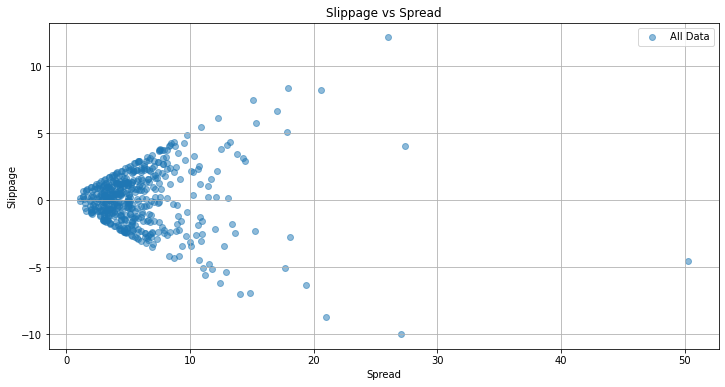

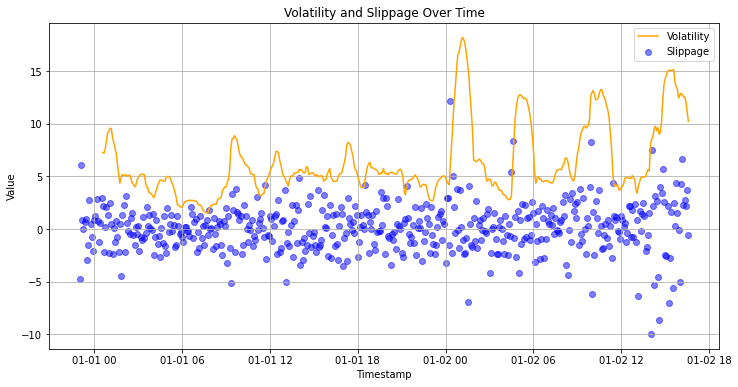

In [30]:
import matplotlib.pyplot as plt

# Load dataset
df = tx_df.copy()

# Ensure timestamp is parsed correctly
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%m/%d/%Y %H:%M', errors='coerce')

# Preprocessing: Calculate Mid-Price, Slippage, and Spread
df['Mid-Price'] = (df['low'] + df['high']) / 2
df['Slippage'] = df['close'] - df['Mid-Price']
df['Spread'] = df['high'] - df['low']

#Liquidity Analysis: Average Spread
liquidity = df.groupby('Centralized/Decentralized')['Spread'].mean()
print("Average Spread by Exchange Type:\n", liquidity)

# Volatility Analysis: Rolling Volatility
df['Volatility'] = df['close'].rolling(window=20).std()

# Active vs Passive Strategy Analysis
# Define Active and Passive as sample thresholds (you can refine)
active_threshold = '1T'  # Resample to 1-minute intervals
passive_threshold = '1H'  # Resample to 1-hour intervals

df_active = df.resample(active_threshold, on='timestamp').mean(numeric_only=True)
df_passive = df.resample(passive_threshold, on='timestamp').mean(numeric_only=True)

# Compare Slippage
print("Active Strategy - Average Slippage:", df_active['Slippage'].mean())
print("Passive Strategy - Average Slippage:", df_passive['Slippage'].mean())

# Centralized vs Decentralized Comparison
centralized = df[df['Centralized/Decentralized'] == 1]
decentralized = df[df['Centralized/Decentralized'] == 2]

print("Centralized Average Slippage:", centralized['Slippage'].mean())
print("Decentralized Average Slippage:", decentralized['Slippage'].mean())

# Visualization: Slippage vs Spread
plt.figure(figsize=(12, 6))
plt.scatter(df['Spread'], df['Slippage'], alpha=0.5, label='All Data')
plt.xlabel('Spread')
plt.ylabel('Slippage')
plt.title('Slippage vs Spread')
plt.legend()
plt.grid()
plt.show()

# Visualization: Volatility and Slippage
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['Volatility'], label='Volatility', color='orange')
plt.scatter(df['timestamp'], df['Slippage'], alpha=0.5, label='Slippage', color='blue')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.title('Volatility and Slippage Over Time')
plt.legend()
plt.grid()
plt.show()
